## Seaborn

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Heat Maps & Cluster Maps


### Scatter Plot

In [249]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
tips = sns.load_dataset('tips')

In [251]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


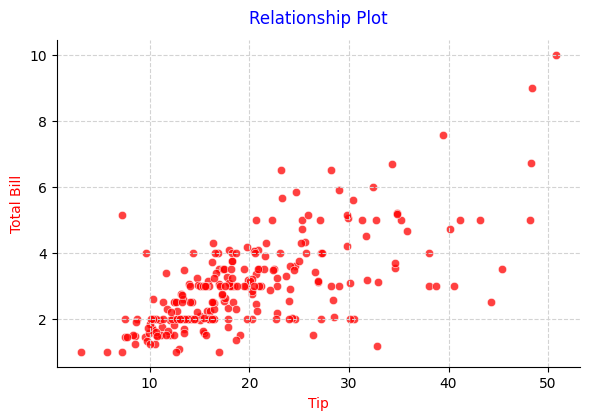

In [252]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, height = 4, aspect = 1.5, alpha = 0.75, color = 'red')

plt.title('Relationship Plot', color = 'blue', pad = 12, family = 'sans-serif')
plt.xlabel('Tip', fontsize = 10, color = 'red')
plt.ylabel('Total Bill', fontsize = 10, color = 'red')
plt.grid(True, color = 'lightgray', linestyle = '--')
plt.show()

### Hue,  Style and Size

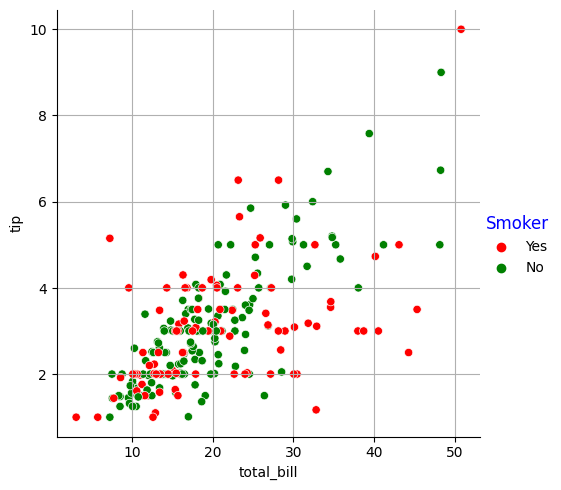

In [253]:
#sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', legend = True)

# customized the legend

g = sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', palette = ['red', 'green'])

#g.legend.set_bbox_to_anchor((0.25, 0.85))  # Adjust the legend position
g.legend.set_title('Smoker')
g.legend.get_title().set_fontsize(12)
g.legend.get_title().set_color('blue')

plt.grid(True)
plt.show()

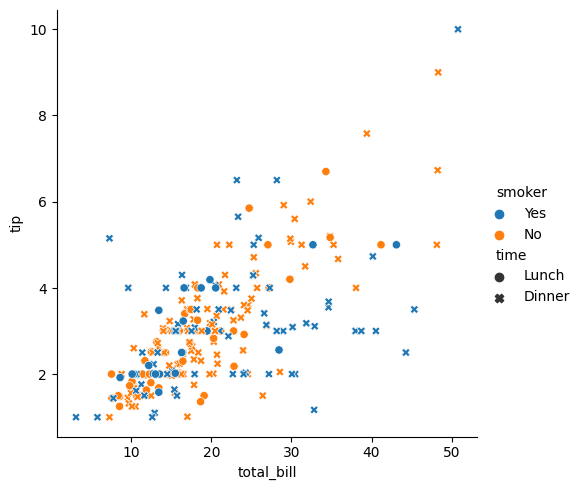

In [254]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

In [255]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

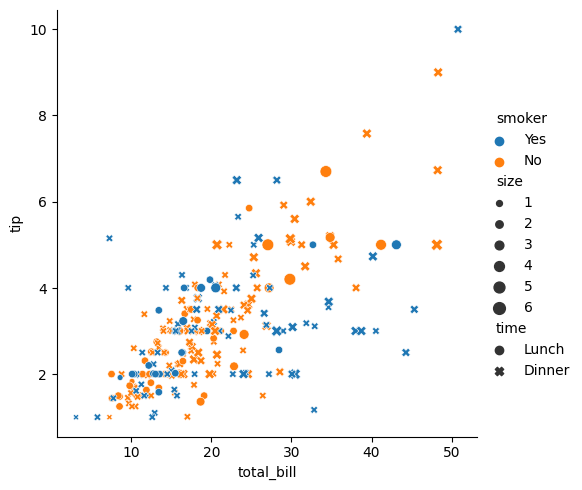

In [256]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time', size= 'size')

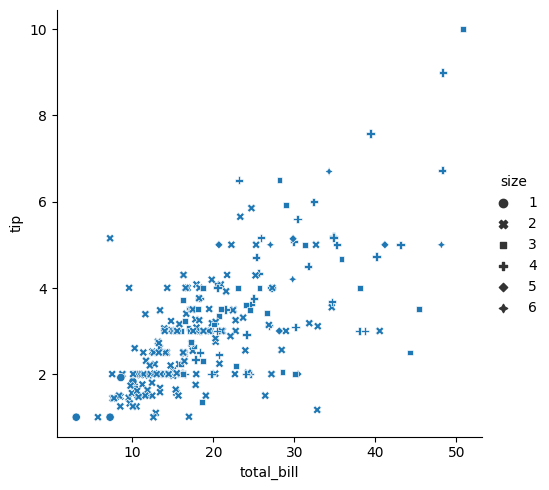

In [257]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, style = 'size')

In [258]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

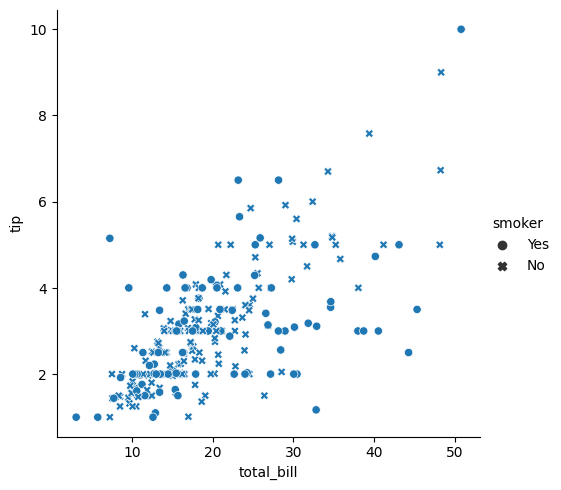

In [259]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, style = 'smoker')

In [260]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

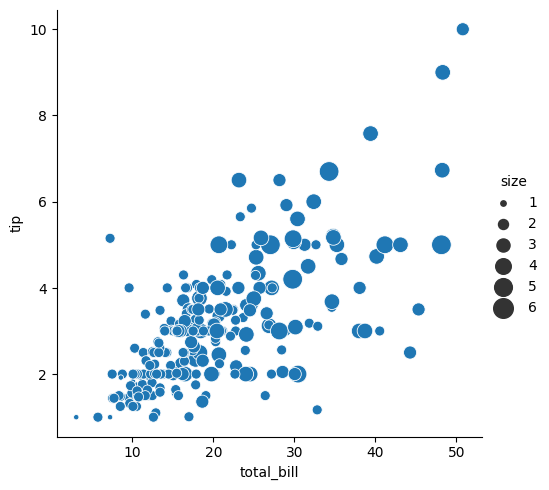

In [261]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15, 200))

In [262]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### Line Plot

In [263]:
from seaborn import relplot

In [264]:
from numpy.random import randn

In [265]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

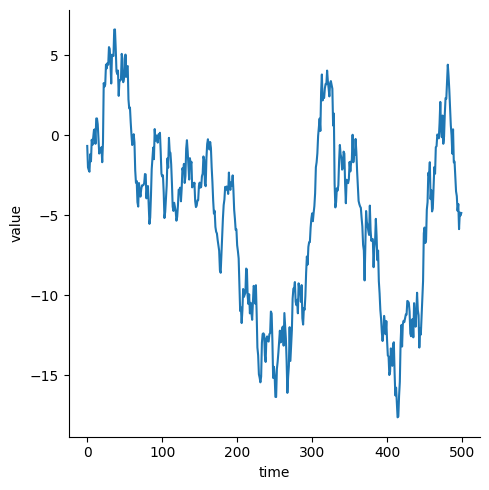

In [334]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)

In [267]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


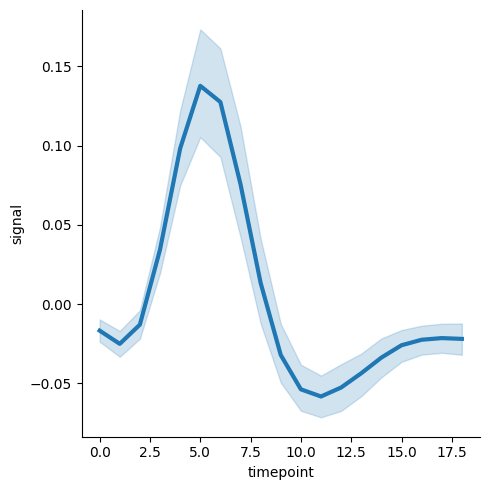

In [268]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, linewidth = 3)

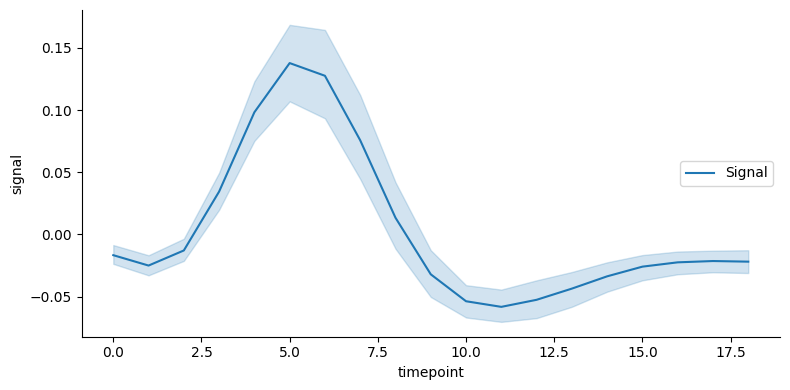

In [335]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, label = 'Signal', height = 4, aspect = 2)
plt.legend(loc='right')

In [270]:
fmri[fmri['timepoint']==5].min()

subject            s0
timepoint           5
event             cue
region        frontal
signal      -0.017946
dtype: object

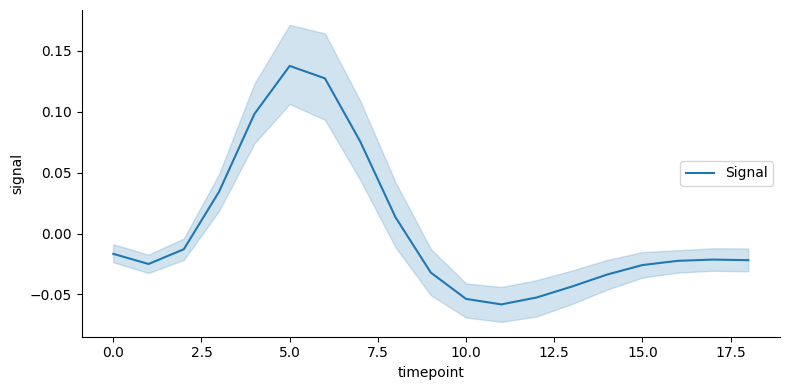

In [345]:
# estimator (mean, sum, count, median, min, max, np.std)
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', estimator = 'mean', data = fmri, label = 'Signal', height = 4, aspect = 2)


plt.legend(loc='right')

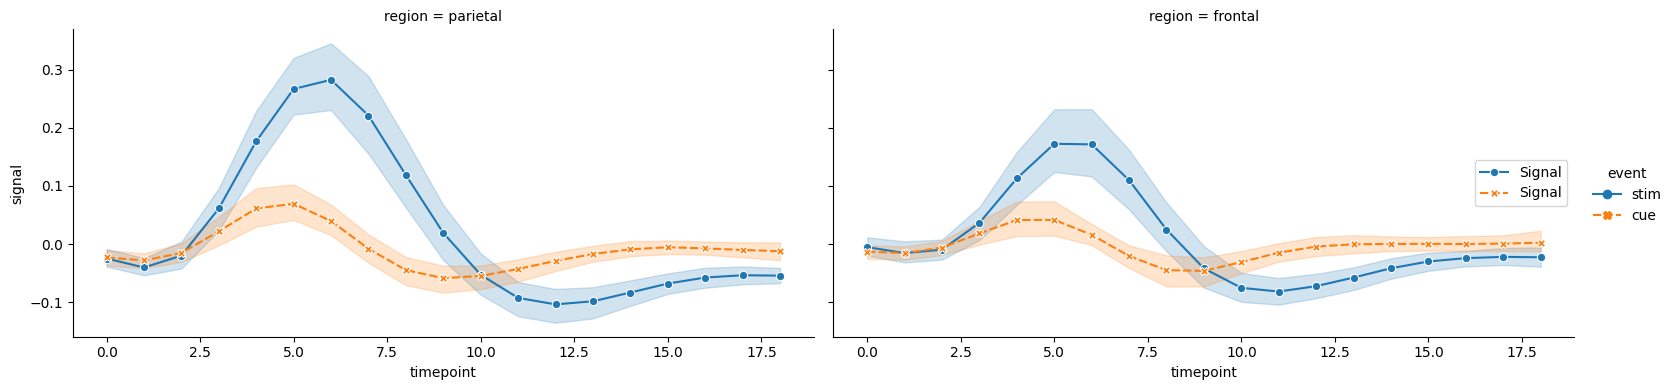

In [272]:
relplot(x = 'timepoint', y = 'signal', kind = 'line', col = 'region', hue = 'event', style = 'event', data = fmri, height = 4, aspect = 2, markers = True, label = 'Signal')
plt.legend(loc='right')
plt.show()

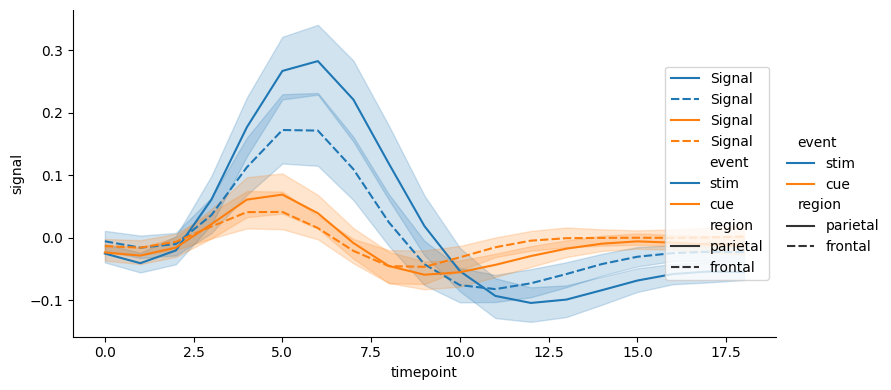

In [273]:
relplot(x = 'timepoint', y = 'signal', kind = 'line', hue = 'event', style = 'region', data = fmri, label = 'Signal', height = 4, aspect = 2)
plt.legend(loc='right')

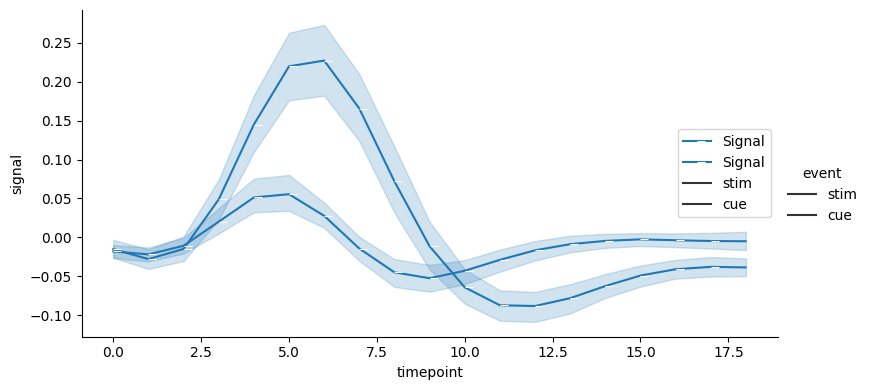

In [348]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', style = 'event', marker = True, dashes = False, data = fmri, label = 'Signal', height = 4, aspect = 2)
plt.legend(loc='right')

In [275]:
dots = sns.load_dataset('dots').query("align == 'dots'")

In [276]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


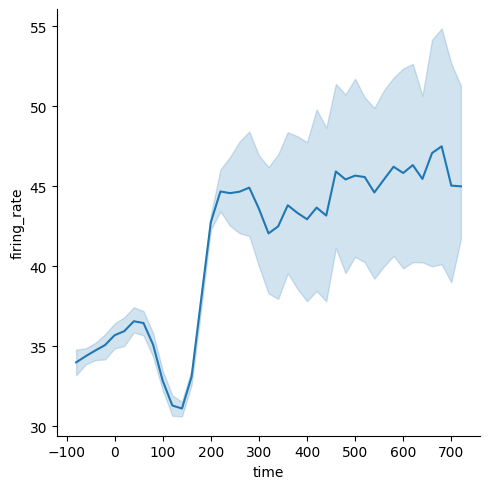

In [277]:
relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line')

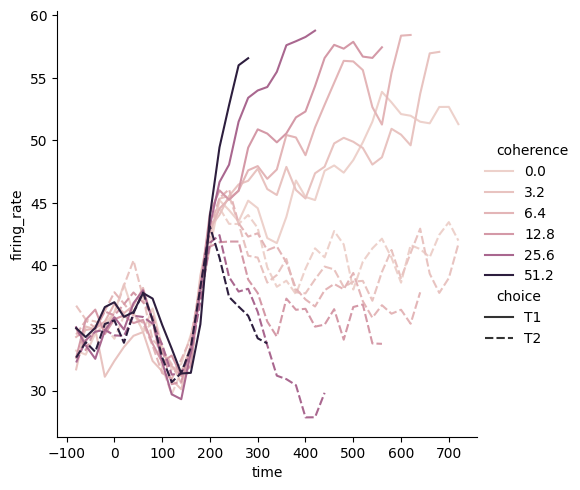

In [278]:
relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

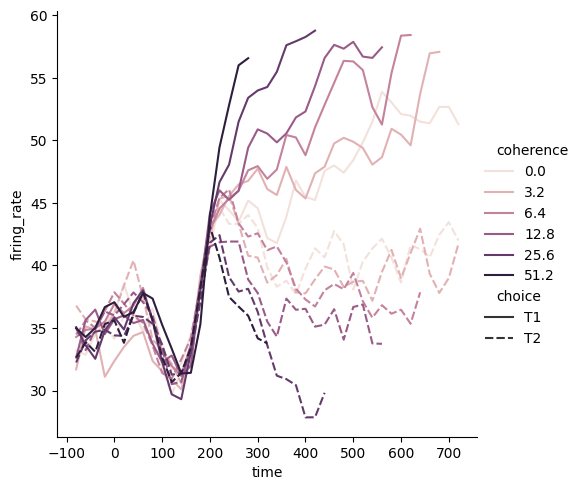

In [279]:
pallette = sns.cubehelix_palette(light = 0.9, n_colors = 6)
relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette = pallette)

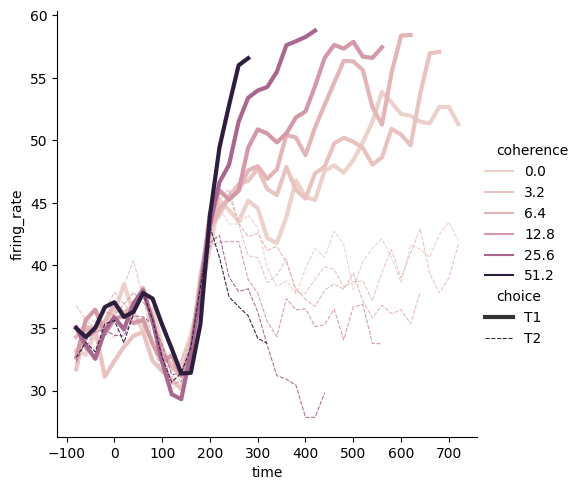

In [280]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', size = 'choice')

### Subplots

In [281]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


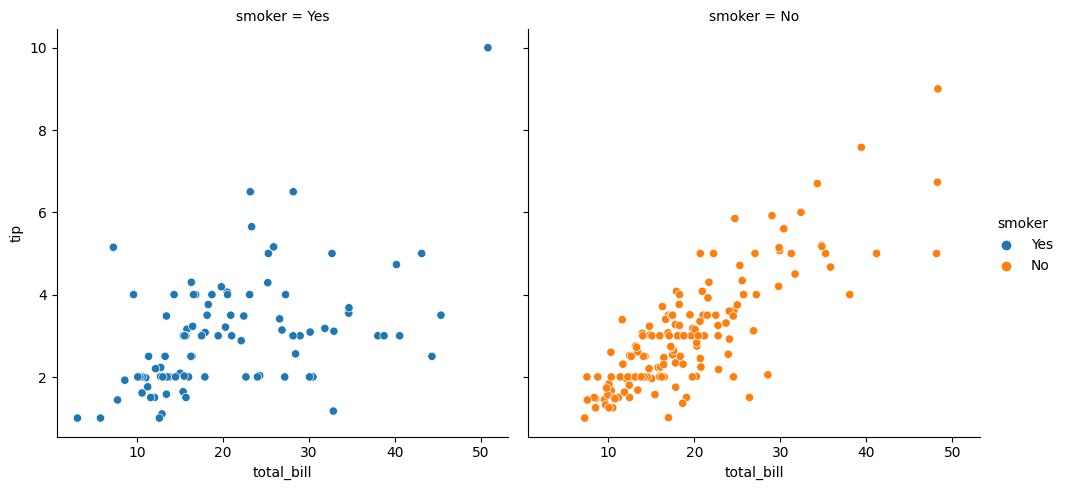

In [349]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'smoker', data = tips)

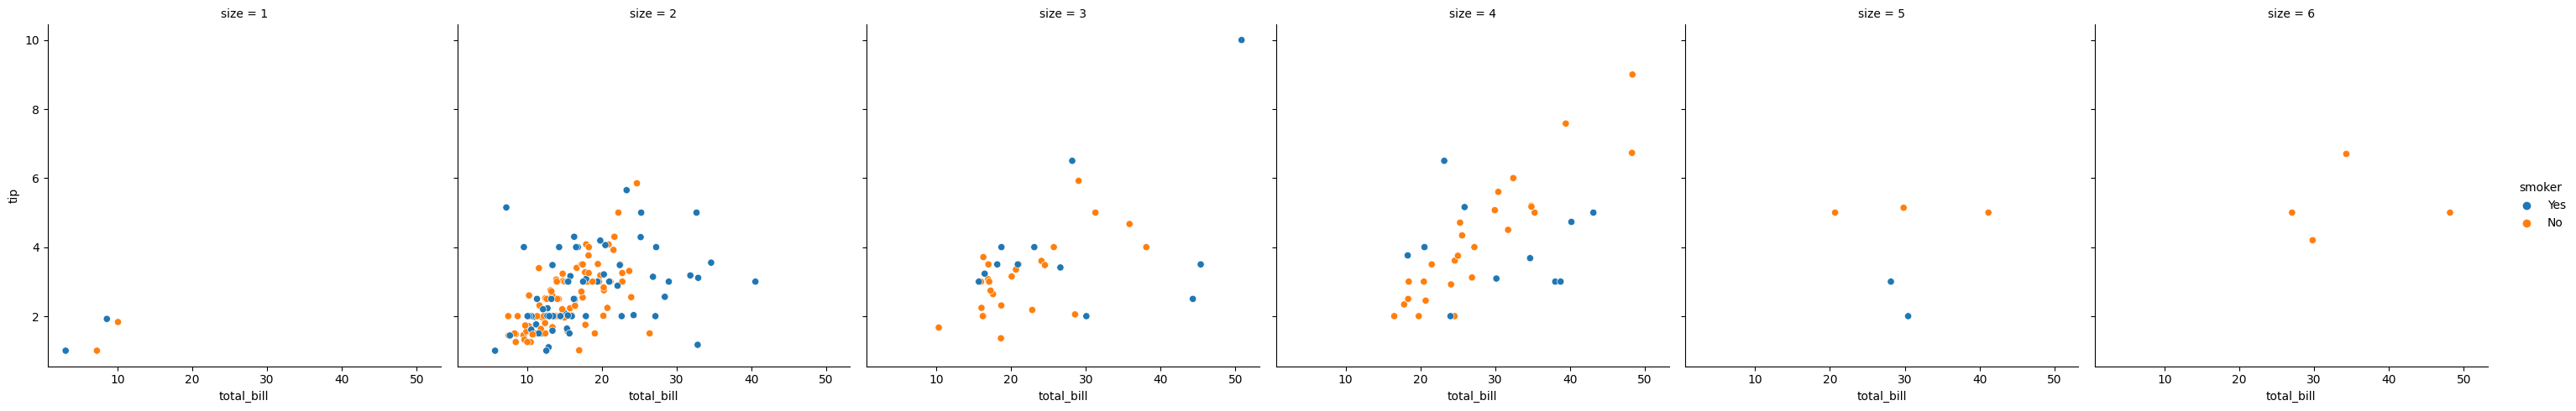

In [283]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips)

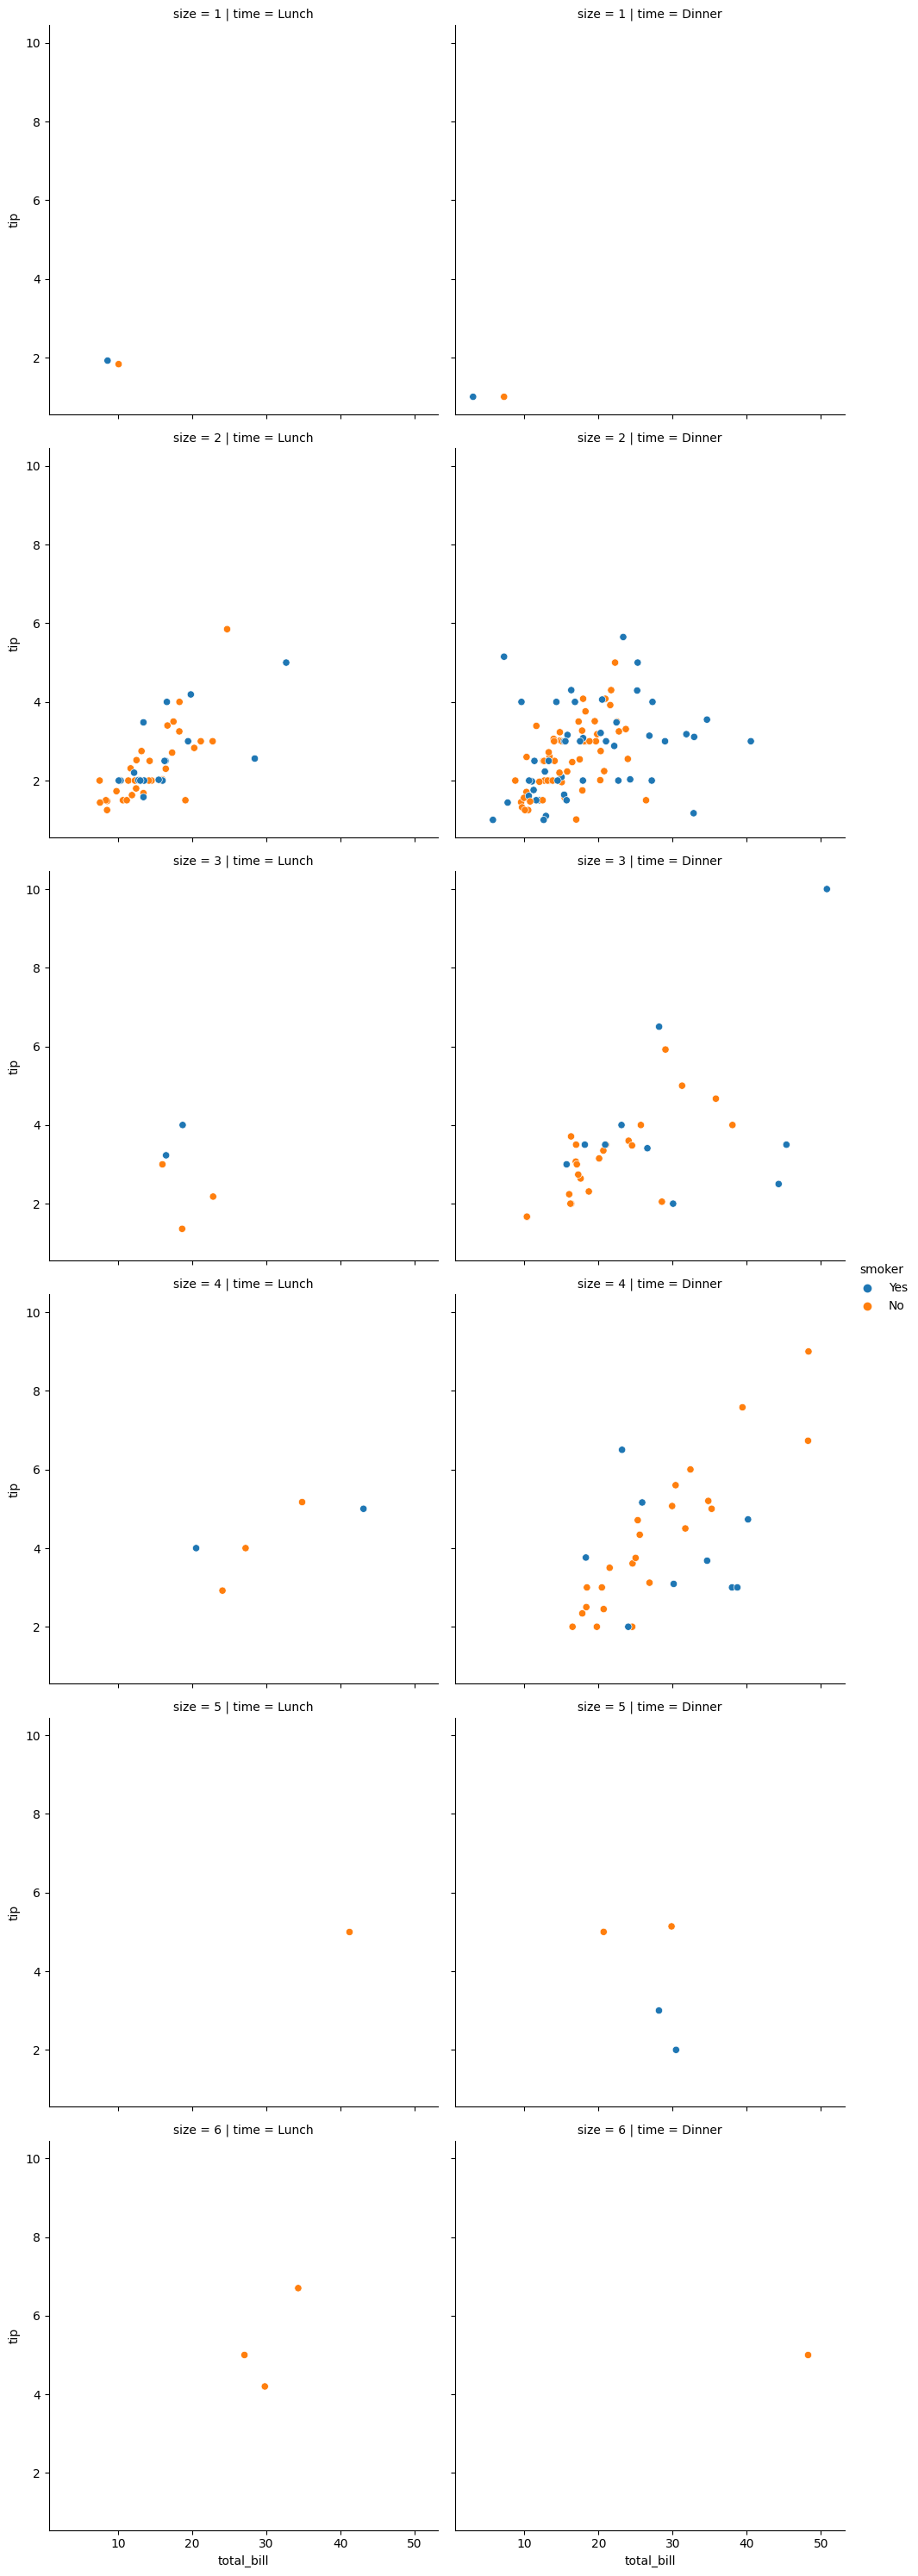

In [284]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips, row = 'size')

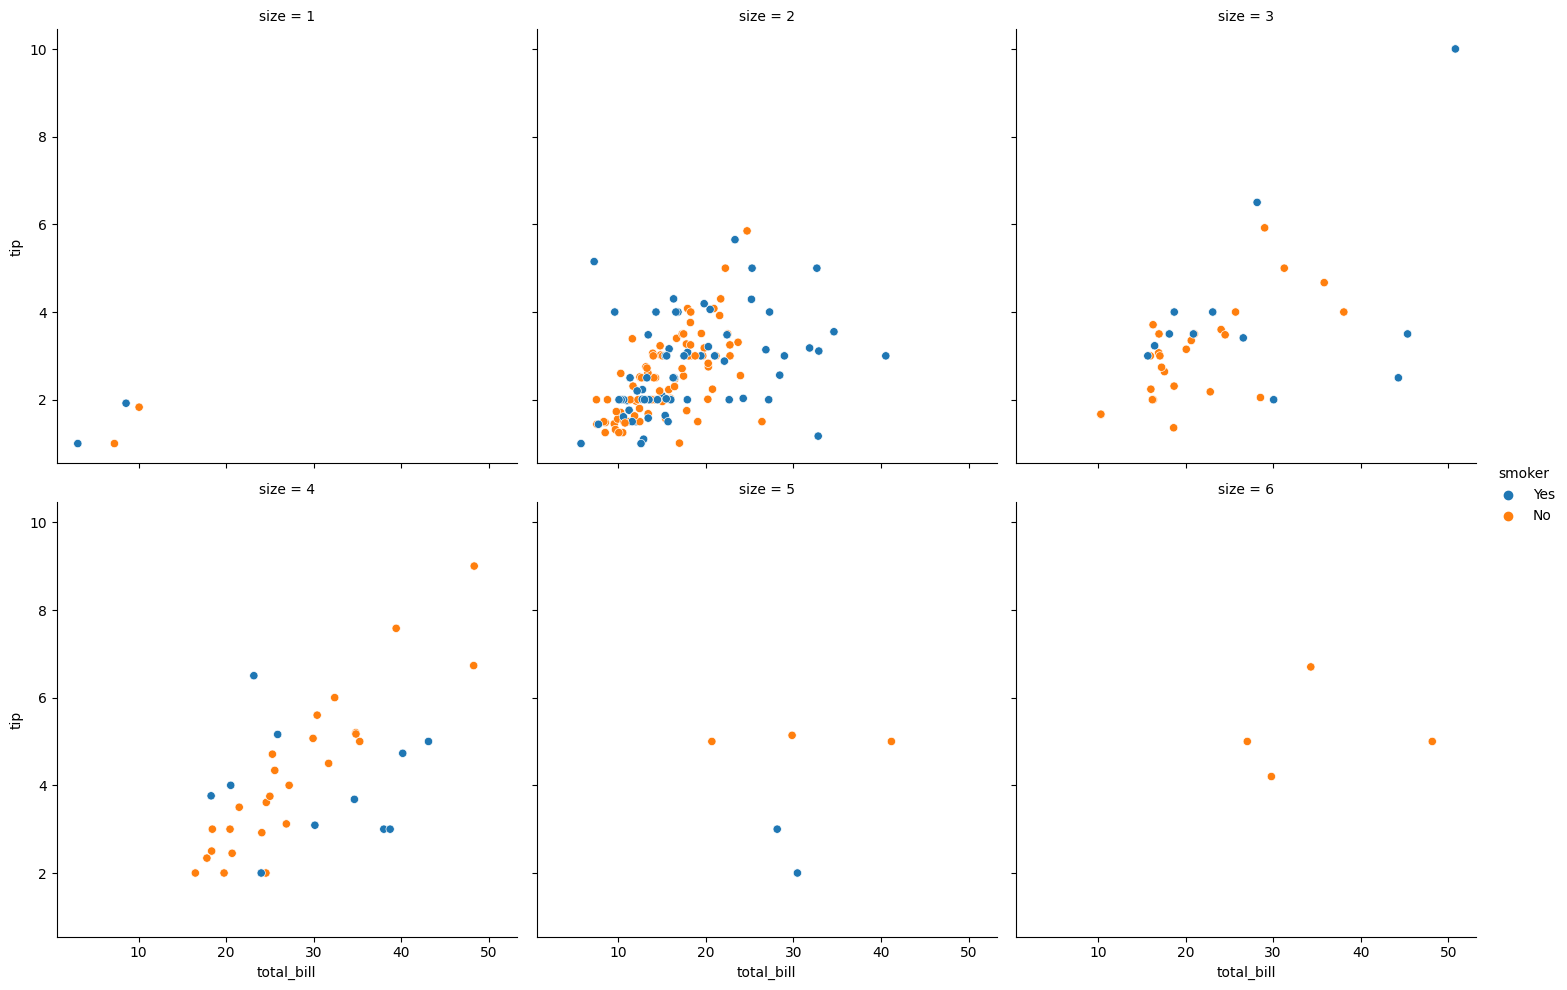

In [285]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips, col_wrap=3)

### Using sns.lineplot() and sns.scatterplot()

In [286]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

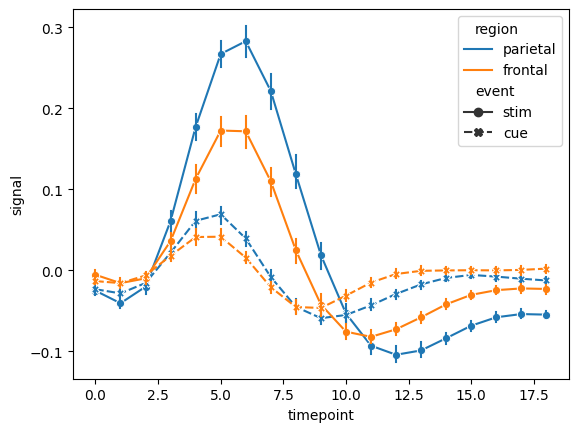

In [358]:
sns.lineplot(x = 'timepoint', y = 'signal', style = 'event', hue = 'region', data = fmri, markers = True, errorbar=('ci', 50), err_style = 'bars')

<Axes: xlabel='timepoint', ylabel='signal'>

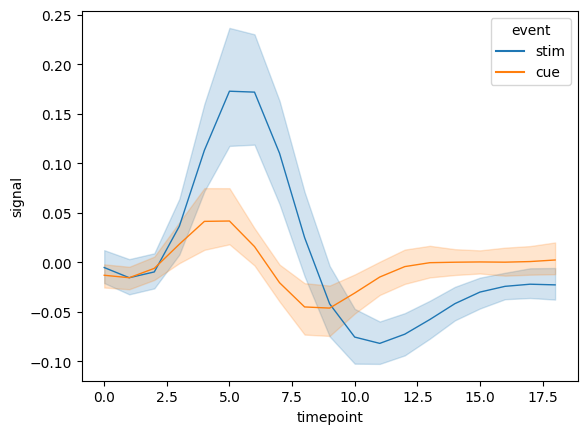

In [359]:
sns.lineplot(x = 'timepoint', y = 'signal',  hue = 'event', data = fmri.query("region == 'frontal'"), estimator = 'mean', lw = 1)

<Axes: xlabel='total_bill', ylabel='tip'>

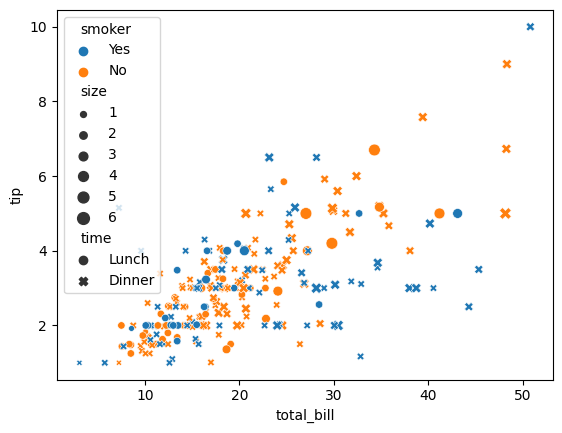

In [289]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

## Categorical Data Ploting

### Cat Plot

In [290]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


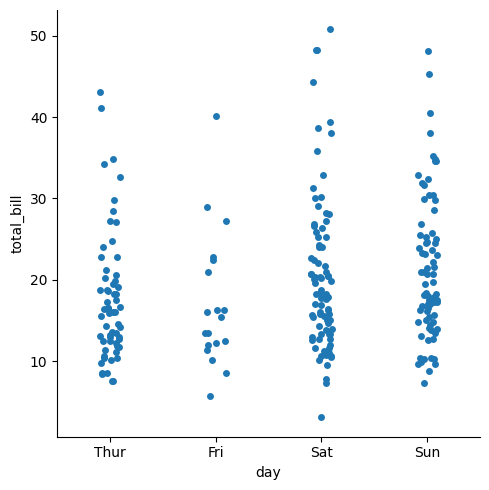

In [291]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

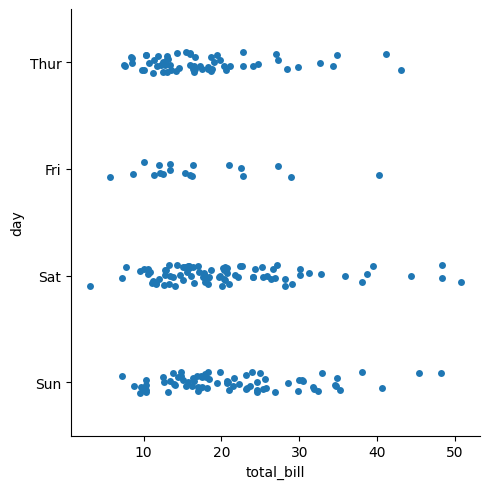

In [292]:
sns.catplot(x = 'total_bill', y = 'day', data = tips)

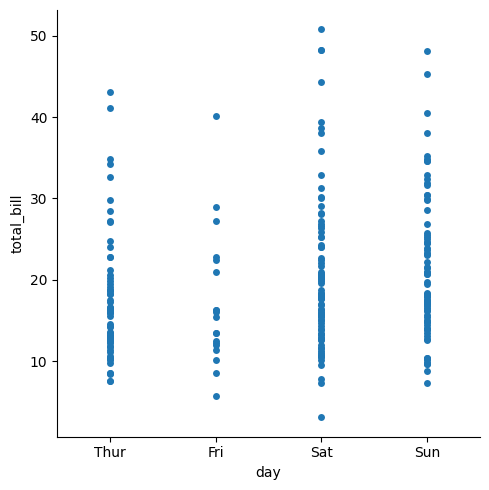

In [317]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

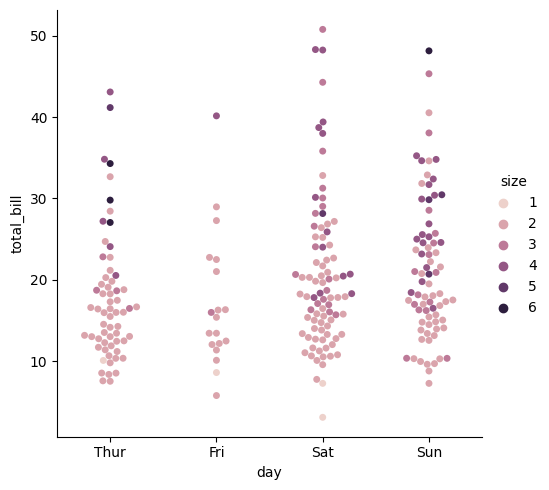

In [294]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'size')

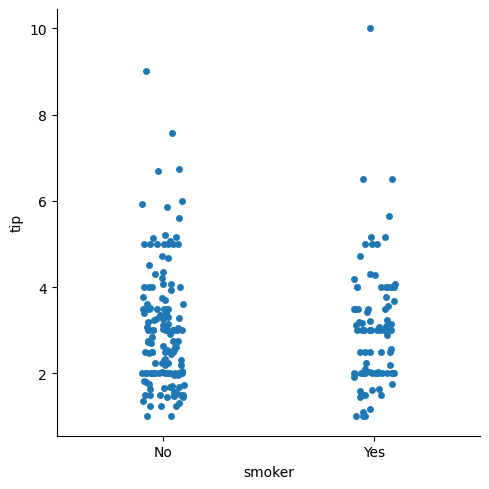

In [295]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order = ['No', 'Yes'])

### Box Plot

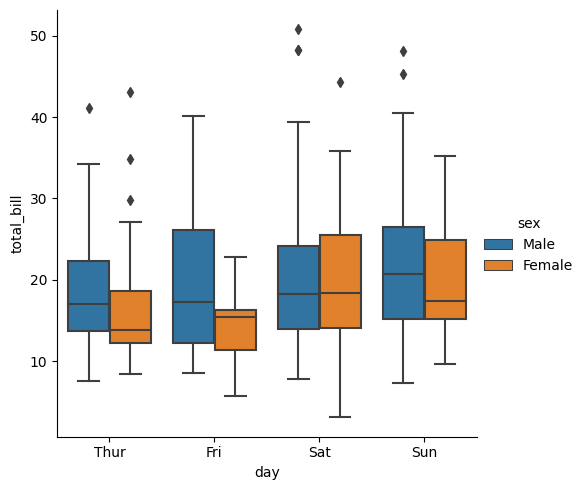

In [296]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex')

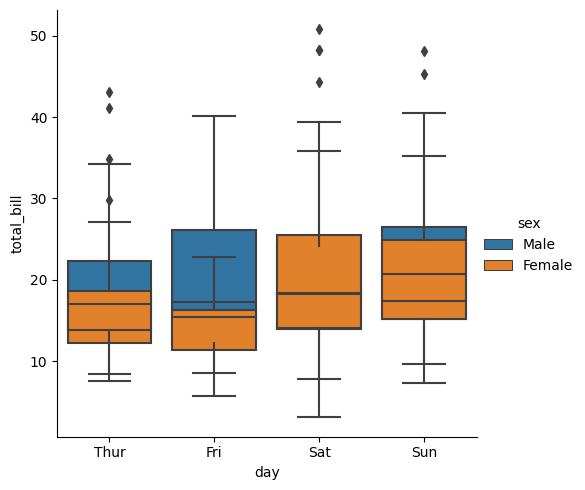

In [297]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex', dodge = False)

### Boxen Plot

In [298]:
diamonds = sns.load_dataset('diamonds')

In [299]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


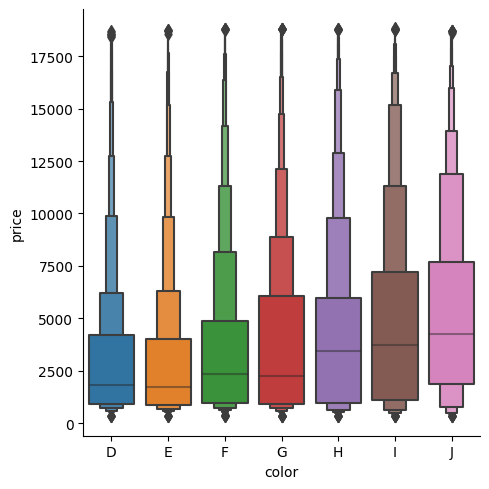

In [300]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds)

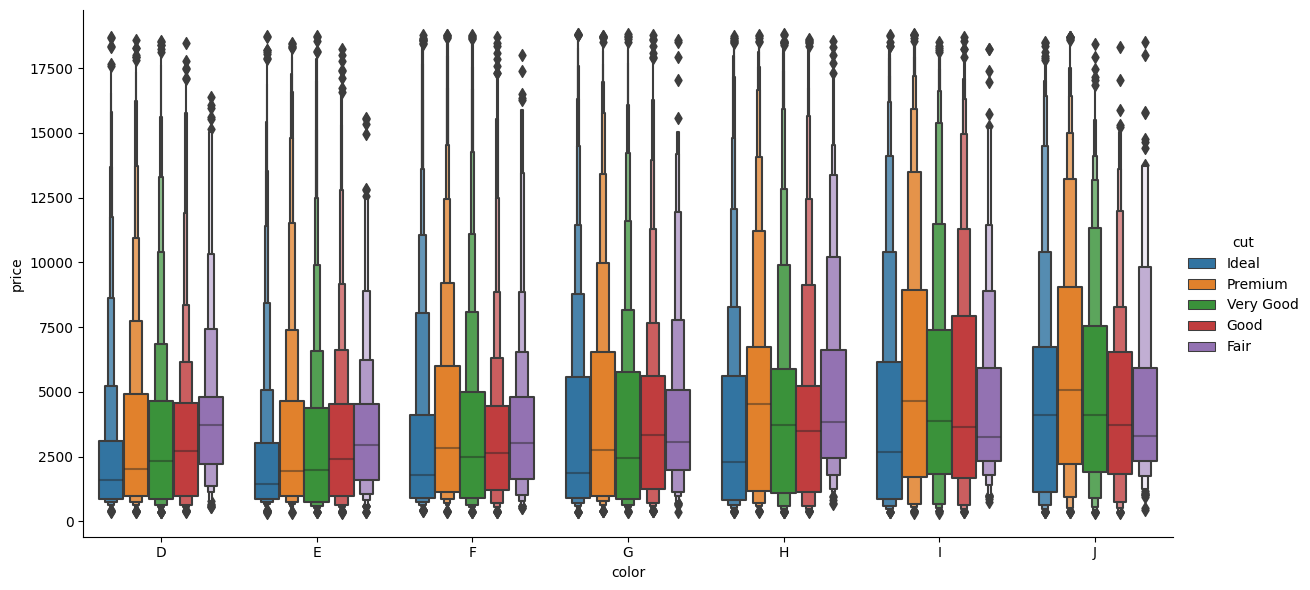

In [315]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds, hue = 'cut', height = 6, aspect = 2)

### Violin Plot

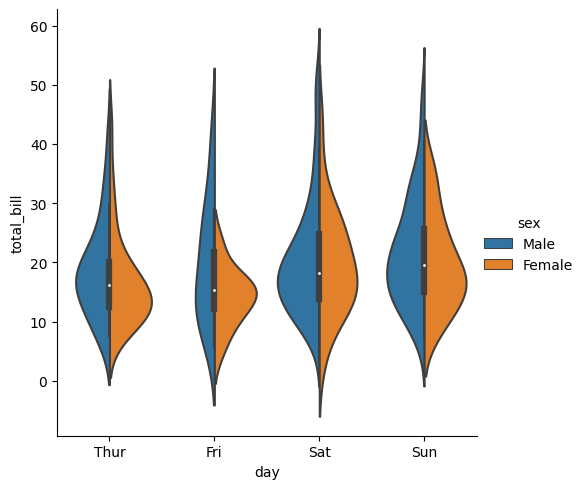

In [314]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'violin', hue = 'sex', split = True)

### Bar Plot

In [303]:
titanic = sns.load_dataset('titanic')

In [304]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


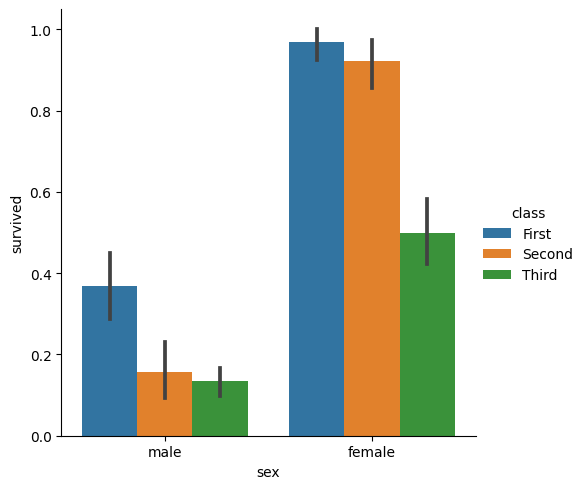

In [305]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'class')

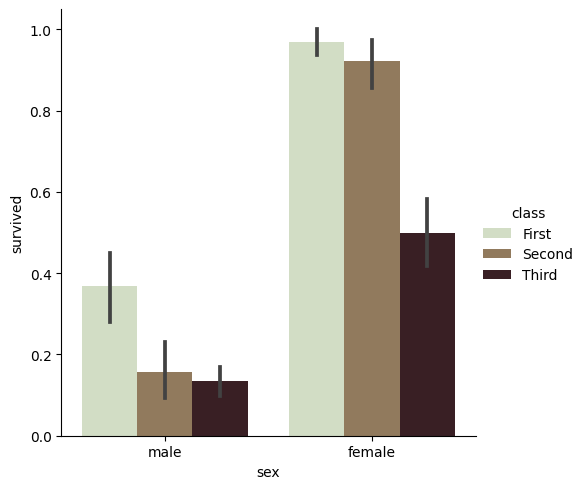

In [306]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'class', palette='ch:0.65')

## Count Plot

<Axes: xlabel='class', ylabel='count'>

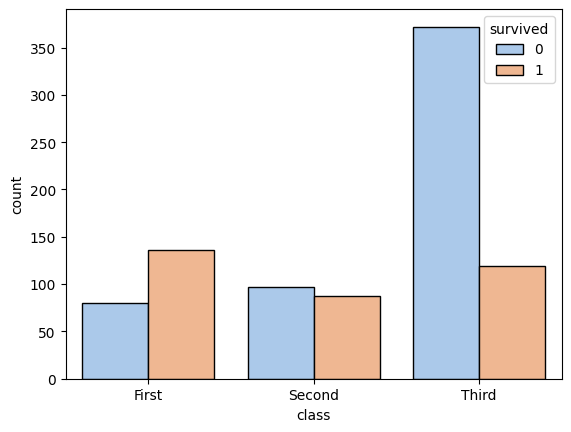

In [328]:
# Count Plot

sns.countplot(x='class', hue='survived', data=titanic, palette='pastel', edgecolor = 'black')

### Point Plot

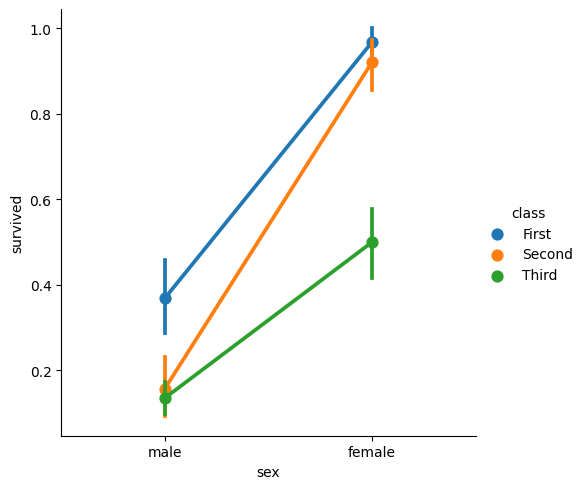

In [307]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

### Joint Plot

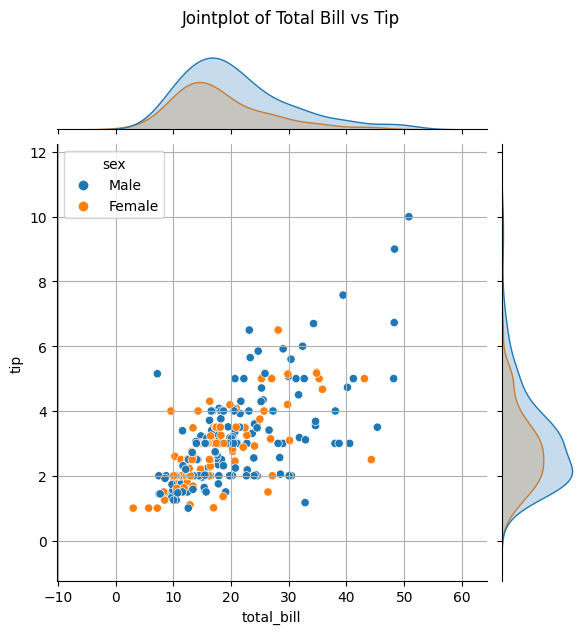

In [308]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# Create a jointplot with scatter plot and histograms
sns.jointplot(x='total_bill', y='tip', data=tips, hue = 'sex', kind='scatter') # or reg, hex, kde, hist, resid, scatter

# Set the title
plt.suptitle('Jointplot of Total Bill vs Tip', y = 1.05)
plt.grid(True)

# Show the plot
plt.show()

### Pair Plot

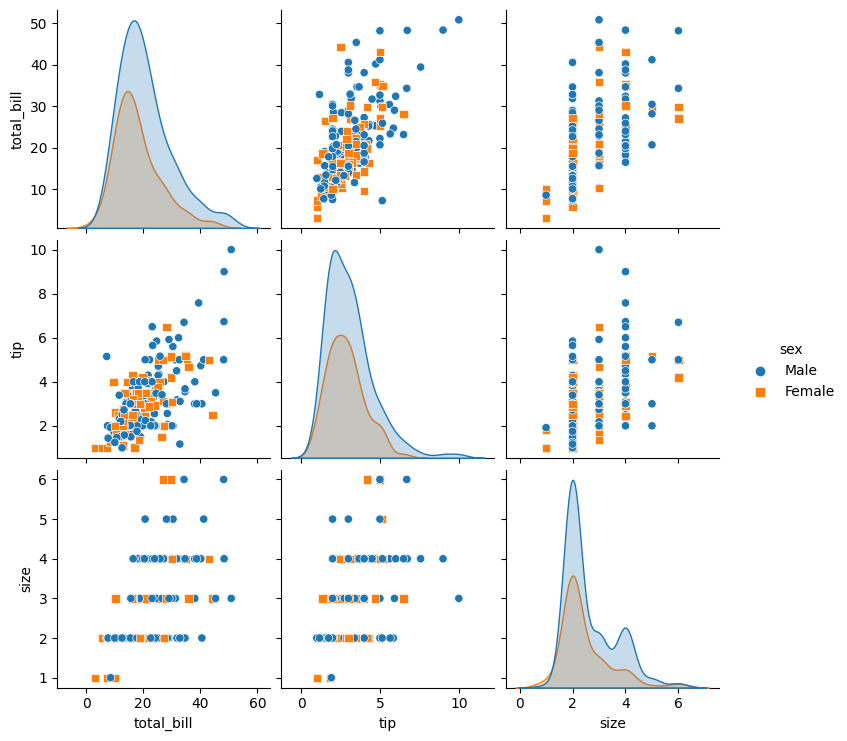

In [309]:
# Create a pairplot

sns.pairplot(tips, hue='sex', markers = ['o', 's'], diag_kind = 'auto') # diag_kind, 'auto', 'hist', 'kde'

### Regression Plot

Text(0.5, 1.0, 'Regression Plot')

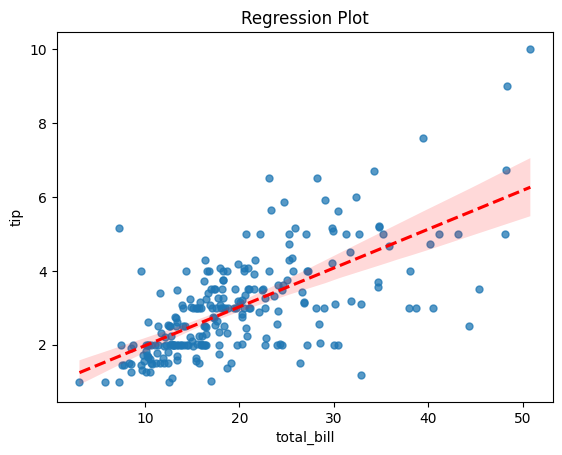

In [310]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips, scatter_kws = {'s': 25, 'alpha': 0.75}, line_kws = {'color': 'red', 'linestyle': '--'})
plt.title('Regression Plot')

Text(0.5, 1.0, 'Regression Plot')

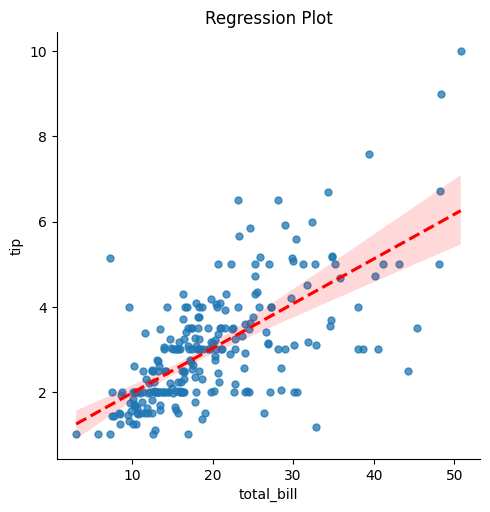

In [311]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, scatter_kws = {'s': 25, 'alpha': 0.75}, line_kws = {'color': 'red', 'linestyle': '--'})
plt.title('Regression Plot')

### Residual Plot

<Axes: xlabel='total_bill', ylabel='tip'>

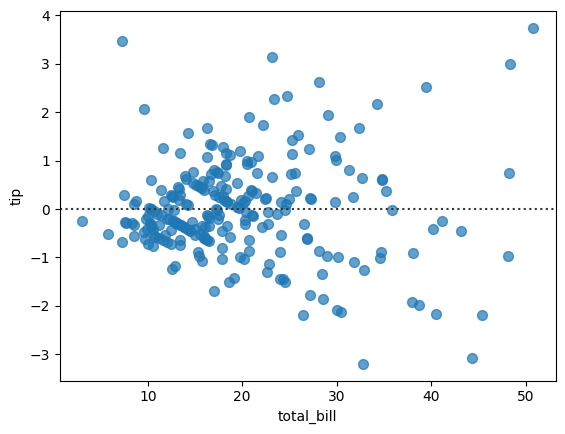

In [329]:
# Create a residplot

sns.residplot(x='total_bill', y='tip', data=tips, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red', 'linestyle': '--'})

## Heat Maps

<Axes: >

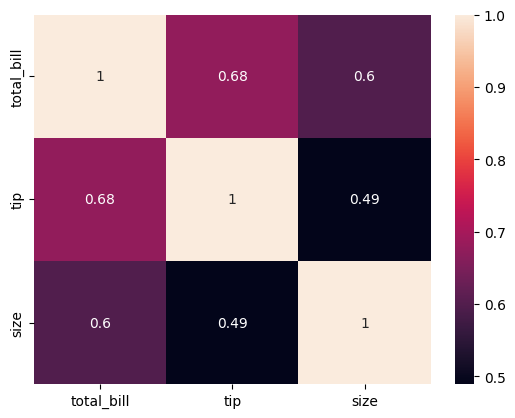

In [324]:
# Create a heatmap of correlations between numeric variables in the tips dataset

correlation_matrix = tips[['total_bill', 'tip', 'size']].corr()

sns.heatmap(correlation_matrix, annot = True)

## Cluster Map

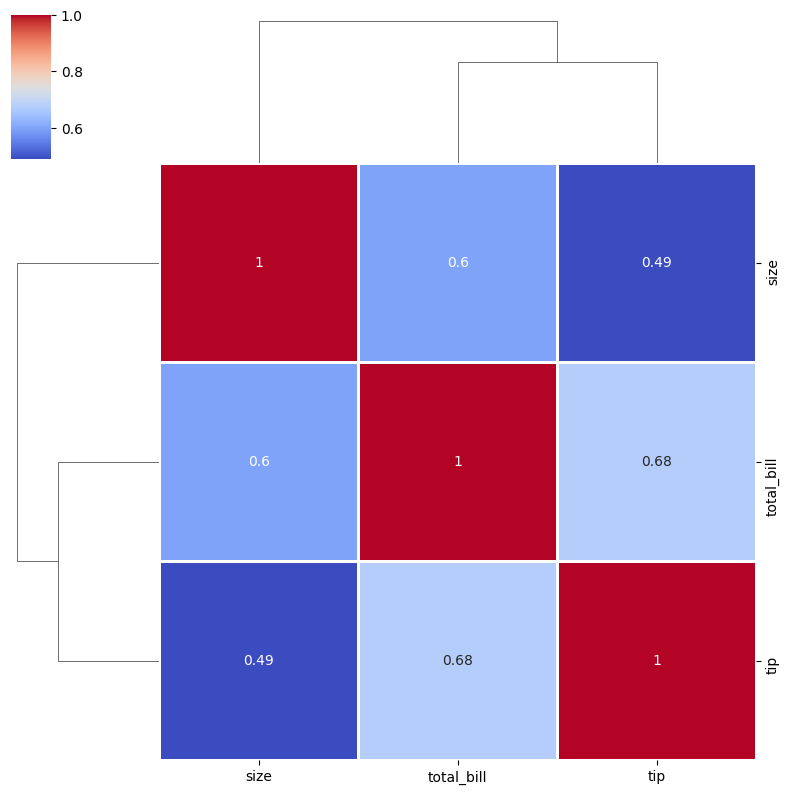

In [333]:
# Create a clustermap
sns.clustermap(tips[['total_bill', 'tip', 'size']].corr(), annot=True, cmap='coolwarm', linewidths=1, figsize=(8, 8))

# Show the plot
plt.show()